# Easy-1

In [23]:
#Easy-1
import pandas as pd
df = pd.read_csv('fct_invoice.csv')
print("How many unique customers are in the dataset?")
df['customer_id'].nunique()

How many unique customers are in the dataset?


5191

# Easy-2

In [28]:
#Easy-2
import pandas as pd
df = pd.read_csv('fct_invoice.csv')
print("What are the different categories of products available?")
print(df['category'].unique())
print("How many unique categories are there?")
df['category'].nunique()

What are the different categories of products available?
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
How many unique categories are there?


8

# Easy-3

In [32]:
#Easy-3
import pandas as pd
df = pd.read_csv('fct_invoice.csv')
print("Which payment method is the most popular?")
pay_method = df['payment_method'].mode()
print(pay_method)
print("How many times was it used?")
x_pay_method = df['payment_method'].value_counts()[pay_method]
print(x_pay_method)

Which payment method is the most popular?
0    Cash
Name: payment_method, dtype: object
How many times was it used?
Cash    44447
Name: payment_method, dtype: int64


# Medium-1

In [ ]:
#Medium-1
import pandas as pd
df = pd.read_csv('fct_invoice.csv')
print("What are the three most popular categories, by total sales?")
df['total_sales'] = df['quantity'] * df['price']
category_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
sort = category_sales.sort_values(ascending=False)
top_categories = sort.iloc[0:3]
print(top_categories)

What are the three most popular categories, by total sales?


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

# Medium-2

In [20]:
import pandas as pd
df1 = pd.read_json('dim_customer.json')
df2 = pd.read_csv('fct_invoice.csv')
df = pd.merge(
        df1,
        df2,
        how = 'inner',
        left_on = 'id',
        right_on = 'customer_id'
    )
print("What are the total sales attributed to customers over the age of 45?")
df = df[df['age'] > 45]
df['total_sales'] = df['quantity'] * df['price']
age_total_sales = df['total_sales'].sum()
print(age_total_sales)


What are the total sales attributed to customers over the age of 45?
82039768.14999999


# Medium-3

How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)


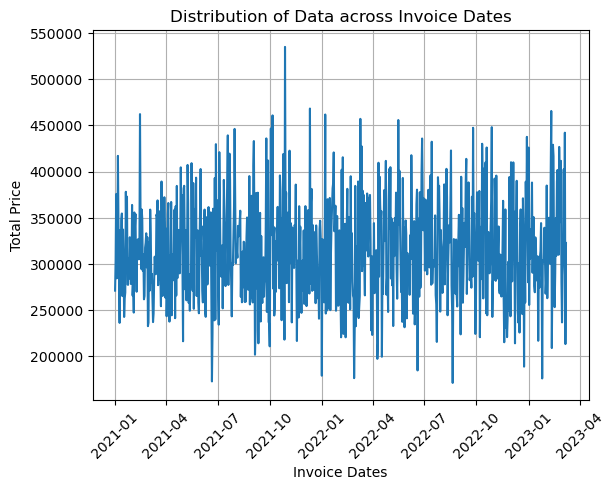

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('fct_invoice.csv')
print("How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)")
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')
df['total_sales'] = df['quantity'] * df['price']
distributed_data = df.groupby('invoice_date')['total_sales'].sum()

plt.plot(distributed_data.index, distributed_data.values)
plt.xlabel('Invoice Dates')
plt.ylabel('Total Price')
plt.title('Distribution of Data across Invoice Dates')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Hard-1

In [21]:
#Hard-1
import pandas as pd
df1 = pd.read_json('dim_customer.json')
df2 = pd.read_csv('fct_invoice.csv')
df = pd.merge(
        df1,
        df2,
        how = 'inner',
        left_on = 'id',
        right_on = 'customer_id'
)
print("Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).")
df['total_sales'] = df['quantity'] * df['price']
df = df.sort_values('age')
age_range = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
bin_age = [10, 20, 30, 40, 50, 60, 70, 80, 90]
df['age_by_decade'] = pd.cut(df['age'], bins = bin_age, labels = age_range)
pivot_table = pd.pivot_table(df, values = 'total_sales', index = 'category', columns = 'age_by_decade', aggfunc = 'sum')
pivot_table

Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).


age_by_decade,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,19891.95,80128.35,84446.10,82946.25,79537.50,76234.80,56251.95,21103.95
Clothing,3029007.52,10079987.28,11516170.16,10933114.72,10819684.48,10004067.04,7871098.40,3739897.04
Cosmetics,178009.48,594733.82,722406.22,656740.32,621366.12,599735.00,427824.52,214684.80
Food & Beverage,20433.61,74271.23,89187.19,85034.57,77686.42,76127.88,55584.44,25334.12
Shoes,1367187.26,6152942.84,7178633.37,6775319.13,6268175.48,5499357.71,4718536.54,2125201.97
Souvenir,20128.68,53570.91,63705.63,65007.66,57594.30,51482.97,38439.21,20234.25
Technology,1772400.00,5049450.00,6231750.00,5840100.00,4662000.00,5218500.00,3773700.00,1449000.00
Toys,98273.28,380011.52,426460.16,378864.64,357002.24,340659.20,285608.96,126336.00
